# Linear Algebra Basics for ML

This notebook will present some examples in the same order mentioned in chapter 1 in "Introduction to Tensors with Python".

## 1.2.1 Vector Operations

In [3]:
import numpy as np

v= np.array ((10, 2, -6))
np.absolute(v).sum() # 1-norm is the sum of the absolute values of the elements

18

2-norm is the magnitude of the vector $ v ∈R^N $, which is its length (Frobenius norm) and is denoted $‖v‖_2$ or $ ‖v‖_F$ 

It is the Euclidean distance from the origin to the point reached by the vector, calculated as $ \sqrt {\sum_{i=1}^N {v_i^2}}$

In [6]:
from numpy import linalg as LA
LA.norm(v)

11.832159566199232

In [15]:
LA.norm(v, 0) #  sum(x != 0)

3.0

In [16]:
LA.norm(v, 1) # using this function for 1-norm calculated above from scratch: max(sum(abs(x), axis=0))

18.0

In [17]:
LA.norm(v, 2) # using this function for 2-norm calculated above using default values,  2-norm (largest sing. value)

11.832159566199232

In [10]:
LA.norm(v, 3) # other norms as  sum(abs(x)**ord)**(1./ord)

10.696962482478725

In [14]:
LA.norm(v, np.inf) # max(sum(abs(x), axis=1)) 

10.0

In [18]:
v/LA.norm(v) # normalising a vector as v/np.sqrt((v**2).sum())

array([ 0.84515425,  0.16903085, -0.50709255])

In [19]:
u= np.array ((-3, 0, -2))
v.dot(u) # Vector Dot (Inner) Product

-18

In [24]:
np.inner(v,u) # np.dot and np.inner are identical for 1-dimensions arrays. For N-dimension arrays, they correspond to common tensor operations.

-18

In [20]:
v@u  # another syntax

-18

In [21]:
np.cross(v,u) # Vector Cross Product

array([-4, 38,  6])

In [22]:
np.outer(v,u) # Vector Outer Product

array([[-30,   0, -20],
       [ -6,   0,  -4],
       [ 18,   0,  12]])

In [25]:
np.multiply(v,u) # Hadamard Product

array([-30,   0,  12])

## Vector Calculus: Derivatives and Gradients

In [29]:
import sympy as sym

x = sym.Symbol('x')
f = sym.sin(x) # one variable functopn
f

sin(x)

In [30]:
f.diff() # the first derivative

cos(x)

In [36]:
f.diff().diff() # the second derivative

-sin(x)

In [33]:
y = sym.Symbol('y')
f2=6*x*(y**3) # two variable function
f2

6*x*y**3

In [34]:
f2.diff(x) # first derivative with respect to x

6*y**3

In [35]:
f2.diff(y) # first derivative with respect to y

18*x*y**2

In [46]:
F = sym.Matrix([f2])
F

Matrix([[6*x*y**3]])

In [47]:
F.jacobian([x,y]) # The Jacobian of a vector-valued function in several variables generalizes the gradient of a scalar-valued function in several variables, which in turn generalizes the derivative of a scalar-valued function of a single variable.

Matrix([[6*y**3, 18*x*y**2]])

In [48]:
H = sym.hessian(f, [x, y]).subs([(x,1), (y,1)])
H

Matrix([
[-sin(1), 0],
[      0, 0]])

## 1.2.1.6 Vector Field, Spaces and Independence
## 1.2.2.5 Linear Combinations and Linear Transformations

These concepts are better explained by navigating through the chapters, python notebooks and expanding the "click to show" and review the python code of the examples: https://bvanderlei.github.io/jupyter-guide-to-linear-algebra/intro.html



In [72]:
def checkDependence (v, u):
    a = np.array([v,u])
    _, indexes = sym.Matrix(a).T.rref()  # T is for transpose, rref: Return reduced row-echelon form of matrix and indices of pivot vars.
    print(indexes)
    print(a[indexes,:])
    if len(indexes) == 2:
        print("linearly independant")
    else:
        print("linearly dependant")

In [74]:
checkDependence (v, u)

(0, 1)
[[10  2 -6]
 [-3  0 -2]]
linearly independant


In [75]:
u=np.array([20, 4, -12])
checkDependence (v, u)

(0,)
[[10  2 -6]]
linearly dependant


In [248]:
np.kron([1,10,100], [5,6,7]) # , Kronecker product of two arrays is a composite array made of blocks of the second array scaled by the first.

array([  5,   6,   7,  50,  60,  70, 500, 600, 700])

## 1.2.2.1: Matrix Multiplication

In [76]:
M= np.array([[2,2,1,0],[2.25,0,0.75,0],[2,1,1.3,2]]) # three recipes in the rows, 4 ingredients in the columns 
M

array([[2.  , 2.  , 1.  , 0.  ],
       [2.25, 0.  , 0.75, 0.  ],
       [2.  , 1.  , 1.3 , 2.  ]])

In [78]:
2*M # doubling the quantities

array([[4. , 4. , 2. , 0. ],
       [4.5, 0. , 1.5, 0. ],
       [4. , 2. , 2.6, 4. ]])

In [84]:
v = np.array( [1, 4, 3]) # Vector / Matrix Multiplication
v.dot(M)

array([17. ,  5. ,  7.9,  6. ])

In [85]:
P= np.array([[0.5,0.2,0.3],[0.0,0.4,0.6]]) # two producers in the rows, 3 suppliers in the columns 
P

array([[0.5, 0.2, 0.3],
       [0. , 0.4, 0.6]])

In [86]:
S= np.array([[0.4,0.6,0.0,0.0],[0.0,0.7,0.3,0.0],[0.0,0.5,0.0,0.5]]) # 3 suppliers in the rows,  four gas stations in the columns 
S

array([[0.4, 0.6, 0. , 0. ],
       [0. , 0.7, 0.3, 0. ],
       [0. , 0.5, 0. , 0.5]])

In [87]:
P.dot(S) # Matrix / Matrix Multiplication

array([[0.2 , 0.59, 0.06, 0.15],
       [0.  , 0.58, 0.12, 0.3 ]])

In [97]:
A = np.random.rand(3,3)
A

array([[0.69321712, 0.91605978, 0.76414377],
       [0.96279434, 0.35903969, 0.77867006],
       [0.46043026, 0.27514903, 0.45912638]])

In [98]:
B= np.random.rand(3,3)
B

array([[0.68002151, 0.33720108, 0.5325899 ],
       [0.60277376, 0.5788585 , 0.7124185 ],
       [0.5303576 , 0.38754052, 0.7061753 ]])

In [99]:
Lie = A.dot(B) - B.dot(A)
Lie

array([[ 0.38757045,  0.1696087 ,  0.53470917],
       [-0.01907966, -0.12177656,  0.08000291],
       [-0.34346301, -0.32682513, -0.26579389]])

## 1.2.2.2 Systems of Equations Solving

In [105]:
A=  np.array([[5,3],[-4,-2]])
b= np.array([93,-66]) 
x=  np.linalg.solve(A,b) # Solve a linear matrix equation, or system of linear scalar equations using LAPACK routine ``_gesv``.
x

array([ 6., 21.])

In [108]:
np.linalg. inv(A)  # Matrix inverse

array([[-1. , -1.5],
       [ 2. ,  2.5]])

In [110]:
A.dot(A.T) # One of the definitions of an orthogonal matrix is that A.dot(A.T) will be the identity matrix. A is not orthogonal

array([[ 34, -26],
       [-26,  20]])

In [112]:
from scipy.stats import ortho_group 

m = ortho_group.rvs(dim=3)
m

array([[ 0.19045032,  0.18961712,  0.96321027],
       [ 0.97849661,  0.04249402, -0.20183815],
       [ 0.07920265, -0.98093813,  0.17744671]])

In [114]:
np.set_printoptions(suppress=True)
m.dot(m.T)  # m is of course

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

In [117]:
A = np.array([[4,2,3],[0,2,4],[1,3,6]])
np.linalg. det(A) # matrix determinant

2.0000000000000027

In [118]:
A = np.array([[5,4,6,3],[0,2,1,0],[9,7,4,6], [2,8,1,3]])
np.linalg. det(A) # matrix determinant

-93.00000000000011

In [165]:
A=  np.array([[1,2],[0.5,1]])
b= np.array([0,0]) 
x=  np.linalg.solve(A,b) # This is a consistent dependent system of equation,  but Singular matrix with zero determinant The system of equations has a solution set: x_1 + 2x_2 = 0
x

LinAlgError: Singular matrix

In [166]:
np.linalg. det(A)

0.0

In [167]:
rref_matrix, rref_pivots= sym.Matrix(A).rref()  #  rref: Return reduced row-echelon form of matrix and indices of pivot vars.
rref_matrix

Matrix([
[1, 2.0],
[0,   0]])

In [168]:
A=  np.array([[1,-2],[0.5,1]])
b= np.array([0,0]) 
x=  np.linalg.solve(A,b) # This is a consistent  system of equation, although the determinant is zero
x

array([0., 0.])

In [171]:
np.linalg. det(A)

0.0

In [169]:
rref_matrix, rref_pivots= sym.Matrix(A).rref()  #  rref: Return reduced row-echelon form of matrix and indices of pivot vars.
rref_matrix

Matrix([
[1, 0],
[0, 1]])

In [172]:
A=  np.array([[1,1],[2,2]])
b= np.array([4,8]) 
x=  np.linalg.solve(A,b) # This is a consistent dependent system of equation,  with many solutions satisfying  x1 + x2 = 4
x

LinAlgError: Singular matrix

In [ ]:
np.linalg. det(A)

In [173]:
rref_matrix, rref_pivots= sym.Matrix(A).rref()  #  rref: Return reduced row-echelon form of matrix and indices of pivot vars.
rref_matrix

Matrix([
[1, 1],
[0, 0]])

In [178]:
A=  np.array([[1,0],[0,1], [1,1]]) # 
b= np.array([1,1, 0]) 
x=  np.linalg.solve(A,b) # This is an inconsistent system of equation,  with no solution
x

LinAlgError: Last 2 dimensions of the array must be square

In [179]:
np.linalg. det(A)

LinAlgError: Last 2 dimensions of the array must be square

In [180]:
np.linalg.lstsq(A,b) # Return the least-squares solution to a linear matrix equation.

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_9012/3473248641.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A,b)


(array([0.33333333, 0.33333333]),
 array([1.33333333]),
 2,
 array([1.73205081, 1.        ]))

In [181]:
np.linalg.lstsq?

In [185]:
x = sym.Symbol('x')
y = sym.Symbol('y')
M = sym.Matrix([[x, y], [1, 0]])
M.diff(x)

Matrix([
[1, 0],
[0, 0]])

In [186]:
M.integrate((x, ))

Matrix([
[x**2/2, x*y],
[     x,   0]])

In [189]:
M.jacobian((x, y))

TypeError: ``self`` must be a row or a column matrix

In [194]:
from sympy.abc import rho, phi
from sympy import sin, cos, Matrix

X = sym.Matrix([rho*cos(phi), rho*sin(phi), rho**2])
X

Matrix([
[rho*cos(phi)],
[rho*sin(phi)],
[      rho**2]])

In [196]:
Y = sym.Matrix([rho, phi])
Y

Matrix([
[rho],
[phi]])

In [197]:
X.jacobian(Y)

Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)],
[   2*rho,             0]])

In [203]:
from sympy import Function, hessian, pprint
from sympy.abc import x, y

f = Function('f')(x, y)
g1 = Function('g')(x, y)
g2 = x**2 + 3*y
f

f(x, y)

In [204]:
g1

g(x, y)

In [205]:
g2

x**2 + 3*y

In [202]:
hessian(f, (x, y), [g1, g2])

Matrix([
[                     0,   0,      Derivative(g(x, y), x),      Derivative(g(x, y), y)],
[                     0,   0,                         2*x,                           3],
[Derivative(g(x, y), x), 2*x, Derivative(f(x, y), (x, 2)),   Derivative(f(x, y), x, y)],
[Derivative(g(x, y), y),   3,   Derivative(f(x, y), x, y), Derivative(f(x, y), (y, 2))]])

## 1.3.2 Tensor Indexing

# Subarrays as Fibers, Slices, indexing options

## Fibers are the higher order analogue of matrix rows and columns. A fiber is defined by fixing every index but one.



In [4]:
import tensorly as tl

X = tl.tensor(np.arange(24).reshape((3, 4, 2)))
X

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [5]:
# (column) 
Mode_1_fiber1_1 = X[..., 0, 0]
Mode_1_fiber1_1

array([ 0,  8, 16])

In [6]:
# (row) 
Mode_2_fiber1_1 = X[0, :, 0]
Mode_2_fiber1_1

array([0, 2, 4, 6])

In [7]:
# (tube)) 
Mode_3_fiber1_1 = X[0, 0, ...]
Mode_3_fiber1_1

array([0, 1])

## Slices, matricisation of 3-way tensors
Slices are two-dimensional sections of a 3-way tensor, defined by fixing all but two indices.  𝑋𝐼×𝐽𝐾  = horizontal slices for the different values of I (first index)  𝑋𝐽×𝐼𝐾  = Lateral slices for the different values of J (middle index)  𝑋𝐾×𝐼𝐽  = frontal slices for the different values of K (last index)

In [8]:
horizontalSlice1 = X[0, ...] # From Size (3, 4, 2) to Size (4, 2), returning from the first dimension, the first slice
horizontalSlice1

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [9]:
LateralSlice1 = X [:, 0, :]# From Size (3, 4, 2) to Size (3, 2), returning from the middle dimension, the first slice
LateralSlice1

array([[ 0,  1],
       [ 8,  9],
       [16, 17]])

In [10]:
frontalSlice1 = X[..., 0]# From Size (3, 4, 2) to Size (3, 4), returning from the third dimension, the first slice
frontalSlice1

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [11]:
frontalSlice2 = X[..., 1]# From Size (3, 4, 2) to Size (3, 4), returning from the third dimension, the second slice
frontalSlice2

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

# Tensor unfolding is form of matricisation (Turning a tensor into a matrix) by flatenning its elements 
in a specific order define by the mode
    
The mode-n matricization of a tensor 
$X^2 \in R^{I_1,I_2,..., I_N}$ 
is denoted by $X_{(n)}$ and arranges the
mode-n fibers to be the columns of the resulting matrix.
\begin{equation}
j = 1 + \sum \limits_{k=1 \\ k\neq n}^N (i_k - 1)J_k, \ \ with \ \ J_k = \prod \limits_{m=1 \\ m \neq n}^{k-1}I_m
\end{equation}

In [312]:
from tensorly import random

tensor = random.random_tensor((3, 3, 3))
tensor

array([[[0.15785204, 0.56224271, 0.09649035],
        [0.2253596 , 0.11302609, 0.22486538],
        [0.52144296, 0.45526878, 0.69003391]],

       [[0.92934567, 0.40778065, 0.69213809],
        [0.82843113, 0.20605553, 0.03487481],
        [0.91039213, 0.16845441, 0.35785234]],

       [[0.80393679, 0.98959772, 0.84417814],
        [0.66121259, 0.72155557, 0.82262486],
        [0.01932844, 0.67299381, 0.73532094]]])

In [313]:
# The tensor vectorisation 
tl.tensor_to_vec(tensor)

array([0.15785204, 0.56224271, 0.09649035, 0.2253596 , 0.11302609,
       0.22486538, 0.52144296, 0.45526878, 0.69003391, 0.92934567,
       0.40778065, 0.69213809, 0.82843113, 0.20605553, 0.03487481,
       0.91039213, 0.16845441, 0.35785234, 0.80393679, 0.98959772,
       0.84417814, 0.66121259, 0.72155557, 0.82262486, 0.01932844,
       0.67299381, 0.73532094])

In [320]:
# The mode-n vectorisation is a mode-n matricization, followed by vertical stacking of the matrix in one column 
# mode-0 vectorisation
tl.tensor_to_vec(unfold(tensor, 0))

array([0.15785204, 0.56224271, 0.09649035, 0.2253596 , 0.11302609,
       0.22486538, 0.52144296, 0.45526878, 0.69003391, 0.92934567,
       0.40778065, 0.69213809, 0.82843113, 0.20605553, 0.03487481,
       0.91039213, 0.16845441, 0.35785234, 0.80393679, 0.98959772,
       0.84417814, 0.66121259, 0.72155557, 0.82262486, 0.01932844,
       0.67299381, 0.73532094])

In [321]:
# mode-1 vectorisation
tl.tensor_to_vec(unfold(tensor, 1))

array([0.15785204, 0.56224271, 0.09649035, 0.92934567, 0.40778065,
       0.69213809, 0.80393679, 0.98959772, 0.84417814, 0.2253596 ,
       0.11302609, 0.22486538, 0.82843113, 0.20605553, 0.03487481,
       0.66121259, 0.72155557, 0.82262486, 0.52144296, 0.45526878,
       0.69003391, 0.91039213, 0.16845441, 0.35785234, 0.01932844,
       0.67299381, 0.73532094])

In [322]:
# mode-2 vectorisation
tl.tensor_to_vec(unfold(tensor, 2))

array([0.15785204, 0.2253596 , 0.52144296, 0.92934567, 0.82843113,
       0.91039213, 0.80393679, 0.66121259, 0.01932844, 0.56224271,
       0.11302609, 0.45526878, 0.40778065, 0.20605553, 0.16845441,
       0.98959772, 0.72155557, 0.67299381, 0.09649035, 0.22486538,
       0.69003391, 0.69213809, 0.03487481, 0.35785234, 0.84417814,
       0.82262486, 0.73532094])

In [12]:
# The mode-n matricization: http://jeankossaifi.com/blog/unfolding.html

tl.unfold(X, 0) # mode-1 unfolding, From Size (3, 4, 2) to Size (3, 4*2), keeping the shape index of the mode as the first shape size, and multiplying the remainng two

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [13]:
# keeping the unfold mode 1 in a variable to fold back as an example

unfolding  = tl.unfold(X, 1) # mode-2 unfolding, From Size (3, 4, 2) to Size (4, 3*2)
unfolding

array([[ 0,  1,  8,  9, 16, 17],
       [ 2,  3, 10, 11, 18, 19],
       [ 4,  5, 12, 13, 20, 21],
       [ 6,  7, 14, 15, 22, 23]])

In [14]:
tl.unfold(X, 2) # mode-3 unfolding, From Size (3, 4, 2) to Size (2, 3*4)

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
       [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]])

In [302]:
# another example
a = np.arange(24).reshape(3, 4, 2)
a
unfold(a, 0) # mode-0 unfolding:

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [303]:
unfold(a, 1) # mode-1 unfolding:

array([[ 0,  1,  8,  9, 16, 17],
       [ 2,  3, 10, 11, 18, 19],
       [ 4,  5, 12, 13, 20, 21],
       [ 6,  7, 14, 15, 22, 23]])

In [304]:
unfold(a, 2) # mode-2 unfolding:

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
       [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]])

## Folding back to original shape

In [15]:
original_shape = X.shape
tl.fold(unfolding, 1, original_shape)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [324]:
# The n-unfolding of a tensor can be formed by automatically calculating the shape of the resulting tensor, here is an example where the shape is fixed
tl.fold(tensor, 1, (9, 9))

array([[0.95862487, 0.1083155 , 0.2179205 , 0.77754626, 0.61236104,
        0.65646368, 0.84419479, 0.48406566, 0.6145775 ],
       [0.32396013, 0.46863424, 0.70414332, 0.14486821, 0.71148949,
        0.80694098, 0.34202876, 0.80642626, 0.73546575],
       [0.31602446, 0.30220233, 0.81908275, 0.09771052, 0.96997373,
        0.83106511, 0.1864604 , 0.90528509, 0.30163064],
       [0.66906794, 0.77653905, 0.54510797, 0.56937594, 0.51085961,
        0.18129514, 0.22931064, 0.27277081, 0.53572697],
       [0.01667094, 0.1752115 , 0.76124456, 0.38141082, 0.14620056,
        0.39040841, 0.98208438, 0.93014926, 0.27800416],
       [0.44144018, 0.05679481, 0.65744627, 0.45283235, 0.90289242,
        0.51215702, 0.83380277, 0.18681492, 0.98800611],
       [0.99145094, 0.53402121, 0.62179912, 0.15670147, 0.55228201,
        0.53125224, 0.69041084, 0.37497069, 0.20920336],
       [0.40112765, 0.11591272, 0.38885812, 0.29891832, 0.05965837,
        0.75743683, 0.55176788, 0.95800012, 0.00376136],


## Einstein Indexing Notation

In [265]:
v = np.array([1, 2, 3])
A = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7, 8],
              [ 9, 10, 11, 12]])

In [266]:
(v[:, np.newaxis] * A).sum(axis=1) # This multiply vector v and Matrix A element-wise and then sum along the rows of the new array

array([ 10,  52, 126])

In [267]:

# This can be expressed in Einstein notation. The documentation of the function says: subscripts : str
'''
subscripts : str
    Specifies the subscripts for summation as comma separated list of
    subscript labels. An implicit (classical Einstein summation)
    calculation is performed unless the explicit indicator '->' is
    included as well as subscript labels of the precise output form.
'''
np.einsum('i,ij->i', v, A) # The signature string 'i,ij->i' has two components. On the left-hand side (left of the ->) we've labelled the two input arrays. To the right of ->, we've labelled the array we want to end up with.

array([ 10,  52, 126])

In [268]:
a = np.arange(25).reshape(5,5)
# Trace of a matrix:
np.einsum('ii', a)

60

In [270]:
# Sum over an axis (requires explicit form):
np.einsum('ij->i', a)

array([ 10,  35,  60,  85, 110])

In [269]:
# Extract the diagonal (requires explicit form):
np.einsum('ii->i', a)

array([ 0,  6, 12, 18, 24])

In [271]:
# For higher dimensional arrays summing a single axis can be done with ellipsis:
np.einsum('...j->...', a)

array([ 10,  35,  60,  85, 110])

In [272]:
# Compute a matrix transpose, or reorder any number of axes:
np.einsum('ji', a)

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [273]:
np.einsum('ij->ji', a)

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [274]:
np.einsum(a, [1,0])

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [275]:
#Vector inner products:
b = np.arange(5)
np.einsum('i,i', b, b)

30

In [276]:
np.einsum(b, [0], b, [0])

30

In [277]:
np.inner(b,b)

30

In [278]:
# Kronecker delta
n = 3
M = np.einsum('ij,kl->ijkl', np.eye(n,n), np.eye(n,n))
M

array([[[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]]])

In [289]:
#Vector cross products:
x = np.array([[1,2,3], [4,5,6], [7, 8, 9]])
y = np.array([[7, 8, 9], [4,5,6], [1,2,3]])
np.cross(x, y)

array([[ -6,  12,  -6],
       [  0,   0,   0],
       [  6, -12,   6]])

In [290]:
# equivalent Einstein cross product 
eijk = np.zeros((3, 3, 3))
eijk[0, 1, 2] = eijk[1, 2, 0] = eijk[2, 0, 1] = 1
eijk[0, 2, 1] = eijk[2, 1, 0] = eijk[1, 0, 2] = -1
np.einsum('ijk,aj,ak->ai', eijk, x, y)

array([[ -6.,  12.,  -6.],
       [  0.,   0.,   0.],
       [  6., -12.,   6.]])

In [291]:
#Vector outer product:
np.einsum('i,j', np.arange(2)+1, b)

array([[0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [292]:
#Matrix vector multiplication:
np.einsum('ij,j', a, b)

array([ 30,  80, 130, 180, 230])

In [231]:
np.dot(a, b)

array([ 30,  80, 130, 180, 230])

In [300]:
#Matrix Matrix multiplication:
np.einsum('ij,jk', a, a)

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

In [299]:
a.dot(a)

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

In [232]:
#Broadcasting and scalar multiplication in numpy:
c = np.arange(6).reshape(2,3)
np.einsum('..., ...', 3, c)

array([[ 0,  3,  6],
       [ 9, 12, 15]])

## 1.3.5 Tensor Products

### Tensor Contraction - n-mode product

representing tensors as nodes of a graph, and indices as edges coming out of this node, contracting a tensor with a vector or matrix multiplication on a particular mode (dimension) is about linking the common index (mode of the contraction)  of the nodes of both tensors.


### Tensor Multiplication by a matrix
for example mode 1 tensor matrix multiplication to the previously defined tensor X and the following matrix
<br>
$X \in R^{3x4x2}$ 
<br>
$U \in R^{2x3}$
<br>
Y = X $x_{1}$ U $\in$ $R^{2x4x2}$

In [16]:
U = tl.tensor(np.arange(6).reshape((2, 3)))
U

array([[0, 1, 2],
       [3, 4, 5]])

In [17]:
tl.tenalg.mode_dot(X, U, 0)

array([[[ 40,  43],
        [ 46,  49],
        [ 52,  55],
        [ 58,  61]],

       [[112, 124],
        [136, 148],
        [160, 172],
        [184, 196]]])

### Tensor n-mode Multiplication by a vector
for example mode 2 tensor vector multiplication to the previously defined tensor X and the following vector

$X \in R^{3x4x2}$ 
<br>
$V \in R^{4}$
<br>
Y=X $x_{2}$ V $\in$ $R^{3x2}$

In [18]:
V = tl.tensor(np.arange(4).reshape((4)))
V

array([0, 1, 2, 3])

In [19]:
tl.tenalg.mode_dot(X, V, 1)

array([[ 28,  34],
       [ 76,  82],
       [124, 130]])

### The Kronecker product 
allows a very efficient way to write Tucker models
<br>
It is denoted by $A \bigotimes B$ for $A \in R^{IxJ}$ and $B \in R^{KxL}$ resulting in a matrix $\in R^{(IK) x (JL)}$. It is defined by:
<br>
\begin{equation}
A \bigotimes B = 
\begin{pmatrix}
a_{11}B & a_{12}B & \dots & a_{1J}B \\
a_{21}B & a_{22}B & \dots & a_{2J}B \\
\vdots & \vdots & \ddots & \vdots \\
a_{I1}B & a_{I2}B & \dots & a_{IJ}B 
\end{pmatrix}
\end{equation}
<br>
$= [a_1 \bigotimes b_1 \ a_1 \bigotimes b_2 \ a_1 \bigotimes b_3 \ \dots \ a_J \bigotimes b_{L-1} \ a_J \bigotimes b_L]$
<br>
<br>
<br>
The Kronecker product can be used to define dyads, which are the outer product of 2 vectors: a ⊗ b' = b' ⊗ a.

In [25]:
np.kron([10,2,-6], [-3,0,-2]) # , numpy defines Kronecker product of two arrays as a composite array made of blocks of the second array scaled by the first.

array([-30,   0, -20,  -6,   0,  -4,  18,   0,  12])

In [26]:
A = tl.tensor(np.arange(6).reshape((2, 3)))
print (A)
B = tl.tensor(np.arange(6).reshape((2, 3)))
print (B)
tl.tenalg.kronecker([A, B]) # resulting in a matrix with shape 4 x 9

[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]


array([[ 0,  0,  0,  0,  1,  2,  0,  2,  4],
       [ 0,  0,  0,  3,  4,  5,  6,  8, 10],
       [ 0,  3,  6,  0,  4,  8,  0,  5, 10],
       [ 9, 12, 15, 12, 16, 20, 15, 20, 25]])

In [21]:
A = tl.tensor(np.arange(4).reshape((2, 2)), dtype=tl.float32)
print (A)
rns = tl.check_random_state(None)
B = tl.tensor(rns.random_sample([2, 2]))
print (B)
tl.tenalg.kronecker([A, B]) # resulting in a matrix with shape 4 x 4

[[0. 1.]
 [2. 3.]]
[[0.36116198 0.23036914]
 [0.33503254 0.26819703]]


array([[0.        , 0.        , 0.36116198, 0.23036914],
       [0.        , 0.        , 0.33503254, 0.26819703],
       [0.72232396, 0.46073828, 1.08348593, 0.69110741],
       [0.67006508, 0.53639405, 1.00509763, 0.80459108]])

In [370]:
P= np.array([[0.5,0.2,0.3],[0.0,0.4,0.6]]) # two producers in the rows, 3 suppliers in the columns 
print(P)
S= np.array([[0.4,0.6,0.0,0.0],[0.0,0.7,0.3,0.0],[0.0,0.5,0.0,0.5]]) # 3 suppliers in the rows,  four gas stations in the columns 
S

[[0.5 0.2 0.3]
 [0.  0.4 0.6]]


array([[0.4, 0.6, 0. , 0. ],
       [0. , 0.7, 0.3, 0. ],
       [0. , 0.5, 0. , 0.5]])

In [371]:
matrices=[P,S]
tl.tenalg.kronecker(matrices, skip_matrix=None, reverse=False) # The Kronecker product 

array([[0.2 , 0.3 , 0.  , 0.  , 0.08, 0.12, 0.  , 0.  , 0.12, 0.18, 0.  ,
        0.  ],
       [0.  , 0.35, 0.15, 0.  , 0.  , 0.14, 0.06, 0.  , 0.  , 0.21, 0.09,
        0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.  , 0.1 , 0.  , 0.1 , 0.  , 0.15, 0.  ,
        0.15],
       [0.  , 0.  , 0.  , 0.  , 0.16, 0.24, 0.  , 0.  , 0.24, 0.36, 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.12, 0.  , 0.  , 0.42, 0.18,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.2 , 0.  , 0.3 , 0.  ,
        0.3 ]])

### The Hadamard product is the elementwise matrix product.
This can be used to formalize weighted regression.
<br>
It is denoted A * B for matrices A and B, both $\in R^{IxJ}$ and also resulting in a matrix $\in R^{IxJ}$. It is defined by:
<br>
\begin{equation}
A * B = 
\begin{pmatrix}
a_{11}B_{11} & a_{12}B_{12} & \dots & a_{1J}B_{1J} \\
a_{21}B_{21} & a_{22}B_{22} & \dots & a_{2J}B_{2J} \\
\vdots & \vdots & \ddots & \vdots \\
a_{I1}B_{I1} & a_{I2}B_{I2} & \dots & a_{IJ}B_{IJ} 
\end{pmatrix}
\end{equation}

<br>


In [22]:
def Hadamard (A, B):
    c = []
    for a, b in zip(tl.tensor_to_vec(A), tl.tensor_to_vec(B)):
        c.append(a * b)
        
    C = tl.tensor(c).reshape(A.shape)
    return C

In [23]:
C = Hadamard (A, B)
C

array([[0.        , 0.23036914],
       [0.67006508, 0.80459108]])

# The Khatri–Rao product is the "matching columnwise" Kronecker product.
provides means for an efficient way to write a PARAFAC model
<br>
The natural extension of a dyad is a triad. The triad consists of a multiplication of three vectors a (I × 1), b (J × 1) and c (K × 1),
<br>
It is denoted by  $A \bigodot B$ for
$A \in R^{IxK}$ and $B \in R^{JxK}$, resulting in a matrix $\in R^{(IJ) x (K)}$. It is defined by:
<br>
$A \bigodot B = [a_1 \bigotimes b_1 \ a_2 \bigotimes b_2 \  \dots \ a_K \bigotimes b_K]$


In [374]:
def khatri_rao(a, u):
    c = a[...,:,np.newaxis,:] * u[...,np.newaxis,:,:]
    # collapse the first two axes
    return c.reshape((-1,) + c.shape[2:])

In [375]:
khatri_rao(P,S.T)

array([[0.2 , 0.  , 0.  ],
       [0.3 , 0.14, 0.15],
       [0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.15],
       [0.  , 0.  , 0.  ],
       [0.  , 0.28, 0.3 ],
       [0.  , 0.12, 0.  ],
       [0.  , 0.  , 0.3 ]])

In [372]:
matrices=[P,S.T]
tl.tenalg.khatri_rao(matrices) # The Khatri-Rao product 

array([[0.2 , 0.  , 0.  ],
       [0.3 , 0.14, 0.15],
       [0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.15],
       [0.  , 0.  , 0.  ],
       [0.  , 0.28, 0.3 ],
       [0.  , 0.12, 0.  ],
       [0.  , 0.  , 0.3 ]])

In [376]:
from scipy.linalg import khatri_rao as kh
kh(P,S.T)

array([[0.2 , 0.  , 0.  ],
       [0.3 , 0.14, 0.15],
       [0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.15],
       [0.  , 0.  , 0.  ],
       [0.  , 0.28, 0.3 ],
       [0.  , 0.12, 0.  ],
       [0.  , 0.  , 0.3 ]])

In [24]:
print (A)
print (B)
tl.tenalg.khatri_rao([A, B]) # resulting in a matrix with shape 4 x 3


[[0. 1.]
 [2. 3.]]
[[0.36116198 0.23036914]
 [0.33503254 0.26819703]]


array([[0.        , 0.23036914],
       [0.        , 0.26819703],
       [0.72232396, 0.69110741],
       [0.67006508, 0.80459108]])

In [323]:
tensor = random.random_tensor((3, 3, 3, 3))
tensor

array([[[[0.95862487, 0.32396013, 0.31602446],
         [0.66906794, 0.01667094, 0.44144018],
         [0.99145094, 0.40112765, 0.30161135]],

        [[0.1083155 , 0.46863424, 0.30220233],
         [0.77653905, 0.1752115 , 0.05679481],
         [0.53402121, 0.11591272, 0.01070243]],

        [[0.2179205 , 0.70414332, 0.81908275],
         [0.54510797, 0.76124456, 0.65744627],
         [0.62179912, 0.38885812, 0.38780665]]],


       [[[0.77754626, 0.14486821, 0.09771052],
         [0.56937594, 0.38141082, 0.45283235],
         [0.15670147, 0.29891832, 0.68880942]],

        [[0.61236104, 0.71148949, 0.96997373],
         [0.51085961, 0.14620056, 0.90289242],
         [0.55228201, 0.05965837, 0.46984693]],

        [[0.65646368, 0.80694098, 0.83106511],
         [0.18129514, 0.39040841, 0.51215702],
         [0.53125224, 0.75743683, 0.33365533]]],


       [[[0.84419479, 0.34202876, 0.1864604 ],
         [0.22931064, 0.98208438, 0.83380277],
         [0.69041084, 0.55176788, 0.49496325

In [326]:
a = np.arange(8).reshape(2, 2, 2)
tensor = tl.tensor(a)
tensor


array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [327]:
tensor.dot(tensor)

array([[[[ 2,  3],
         [ 6,  7]],

        [[ 6, 11],
         [26, 31]]],


       [[[10, 19],
         [46, 55]],

        [[14, 27],
         [66, 79]]]])

In [328]:
a.dot(a)

array([[[[ 2,  3],
         [ 6,  7]],

        [[ 6, 11],
         [26, 31]]],


       [[[10, 19],
         [46, 55]],

        [[14, 27],
         [66, 79]]]])

In [388]:
#Tensor contraction in numpy:
a = np.arange(60.).reshape(3,4,5)
a

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]],

       [[20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.]],

       [[40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.],
        [50., 51., 52., 53., 54.],
        [55., 56., 57., 58., 59.]]])

In [389]:
b = np.arange(24.).reshape(4,3,2)
b

array([[[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.]],

       [[ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]],

       [[12., 13.],
        [14., 15.],
        [16., 17.]],

       [[18., 19.],
        [20., 21.],
        [22., 23.]]])

In [390]:
np.einsum('ijk,jil->kl', a, b)

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [391]:
np.einsum(a, [0,1,2], b, [1,0,3], [2,3])

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [392]:
np.tensordot(a,b, axes=([1,0],[0,1]))

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [401]:
t1 = tl.tensor(a)
t2 = tl.tensor(b)
tl.tenalg.tensordot(t1, t2,[[1,0], [0,1]])

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [402]:
tl.tenalg.tensordot(t1, t2,[1,0])

array([[[[ 420.,  450.],
         [ 480.,  510.],
         [ 540.,  570.]],

        [[ 456.,  490.],
         [ 524.,  558.],
         [ 592.,  626.]],

        [[ 492.,  530.],
         [ 568.,  606.],
         [ 644.,  682.]],

        [[ 528.,  570.],
         [ 612.,  654.],
         [ 696.,  738.]],

        [[ 564.,  610.],
         [ 656.,  702.],
         [ 748.,  794.]]],


       [[[1140., 1250.],
         [1360., 1470.],
         [1580., 1690.]],

        [[1176., 1290.],
         [1404., 1518.],
         [1632., 1746.]],

        [[1212., 1330.],
         [1448., 1566.],
         [1684., 1802.]],

        [[1248., 1370.],
         [1492., 1614.],
         [1736., 1858.]],

        [[1284., 1410.],
         [1536., 1662.],
         [1788., 1914.]]],


       [[[1860., 2050.],
         [2240., 2430.],
         [2620., 2810.]],

        [[1896., 2090.],
         [2284., 2478.],
         [2672., 2866.]],

        [[1932., 2130.],
         [2328., 2526.],
         [2724., 2922.

In [349]:
t1 = tl.tensor([10,2,-6])
b =np.array([-3, 0, -2])
t1.dot(b)

-18

In [351]:
tl.tenalg.mode_dot(t1, b, 0) # dot product is tensor mode-1 product 

array(-18)

In [377]:
t1 = tl.tensor(P)
t1+t1 # simple element wise addition

array([[1. , 0.4, 0.6],
       [0. , 0.8, 1.2]])

## Other Tensor Algebra Functions that are usually implemented when needed

It can be an interesting exercise to standardise an efficient implementation of the other tensor operations for all theoritical tensor multilinear algebra that are not readily available in numpy and tensorly:
1. Direct sum of tensors 
2. Partial mode-n sums for tensors 
3. Concatenation of Nth-order tensors 
4. 3D convolution 
5. Partial (mode-n) convolution 
6. Testing if a tensor is Orthonormal 


## Sample exercise for a graph defined as igraph object, another package will be presented in ch2

In [406]:
!pip install igraph

In [408]:
from igraph import *

g = Graph()
g.add_vertices(9)  # two producers in the rows + 3 suppliers in the columns +  four gas stations in the columns  
g.add_edges([(0,2), (0,3), (0,4), (1,3), (1,4), (2,5), (2,6), (3,6), (3,7), (4, 6), (4,8)])
summary(g)

IGRAPH U--- 9 11 -- 


In [415]:
!pip install pycairo
!pip install cairocffi

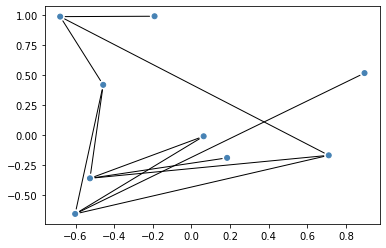

In [418]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot(g, layout=layout, target=ax)